## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Readind the data file

In [2]:
df = pd.read_csv("data/stud.csv")

## Top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## shape of the dataframe

In [4]:
df.shape

(1000, 8)

## Checking for null and duplicate values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

-- No NAN values

In [6]:
df.duplicated().sum()

np.int64(0)

--- No duplicated values in the dataset

## Getting the type of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Checking the statistics of the dataset 

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Getting the unique values in each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Checking categorical unique values in first 5 columns

In [10]:
print("Categories in gender variable: ", end =" ")
print(df["gender"].unique())
print("Categories in race_ethnicity variable: ", end =" ")
print(df["race_ethnicity"].unique())
print("Categories in parental_level_of_education variable: ", end =" ")
print(df["parental_level_of_education"].unique())
print("Categories in lunch variable: ", end =" ")
print(df["lunch"].unique())
print("Categories in test_preparation_course variable: ", end =" ")
print(df["test_preparation_course"].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


## df before adding new variables

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Adding new variables total_score and avg_score in the dataframe

In [12]:
df["total_score"] = df['math_score'] + df["reading_score"] + df["writing_score"]
df["avg_score"] = df["total_score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score'] == 100]["avg_score"].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()
math_full = df[df['math_score'] == 100]['avg_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['avg_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['avg_score'].count()
math_less_20 = df[df['math_score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Visualizatoin Part

<Axes: xlabel='avg_score', ylabel='Count'>

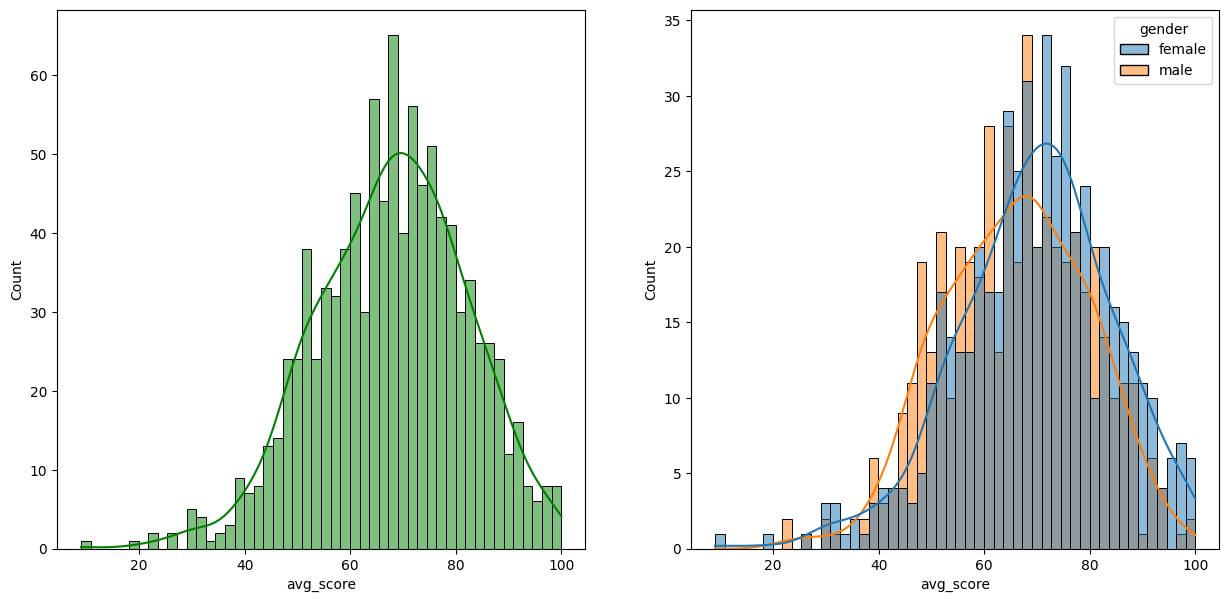

In [19]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, kde = True, bins = 50, color = 'g', x = "avg_score")
plt.subplot(122)
sns.histplot(data = df, kde = True, x = "avg_score", hue = "gender", bins = 50)

<Axes: xlabel='total_score', ylabel='Count'>

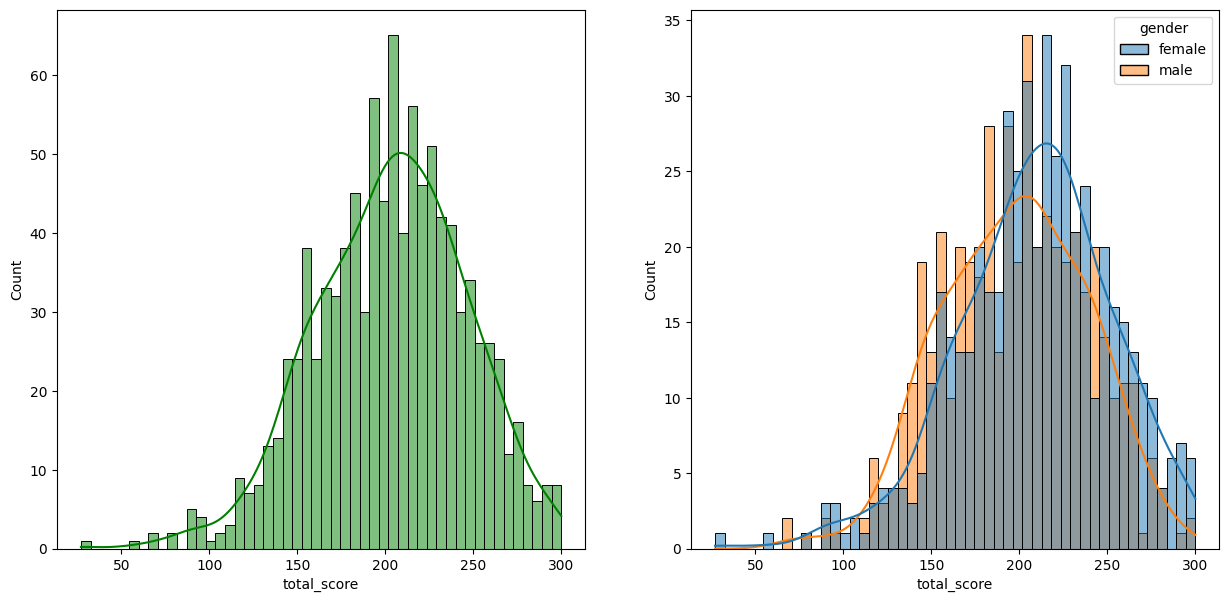

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, kde = True, bins = 50, color = 'g', x = "total_score")
plt.subplot(122)
sns.histplot(data = df, kde = True, x = "total_score", hue = "gender", bins = 50)

<Axes: xlabel='avg_score', ylabel='Count'>

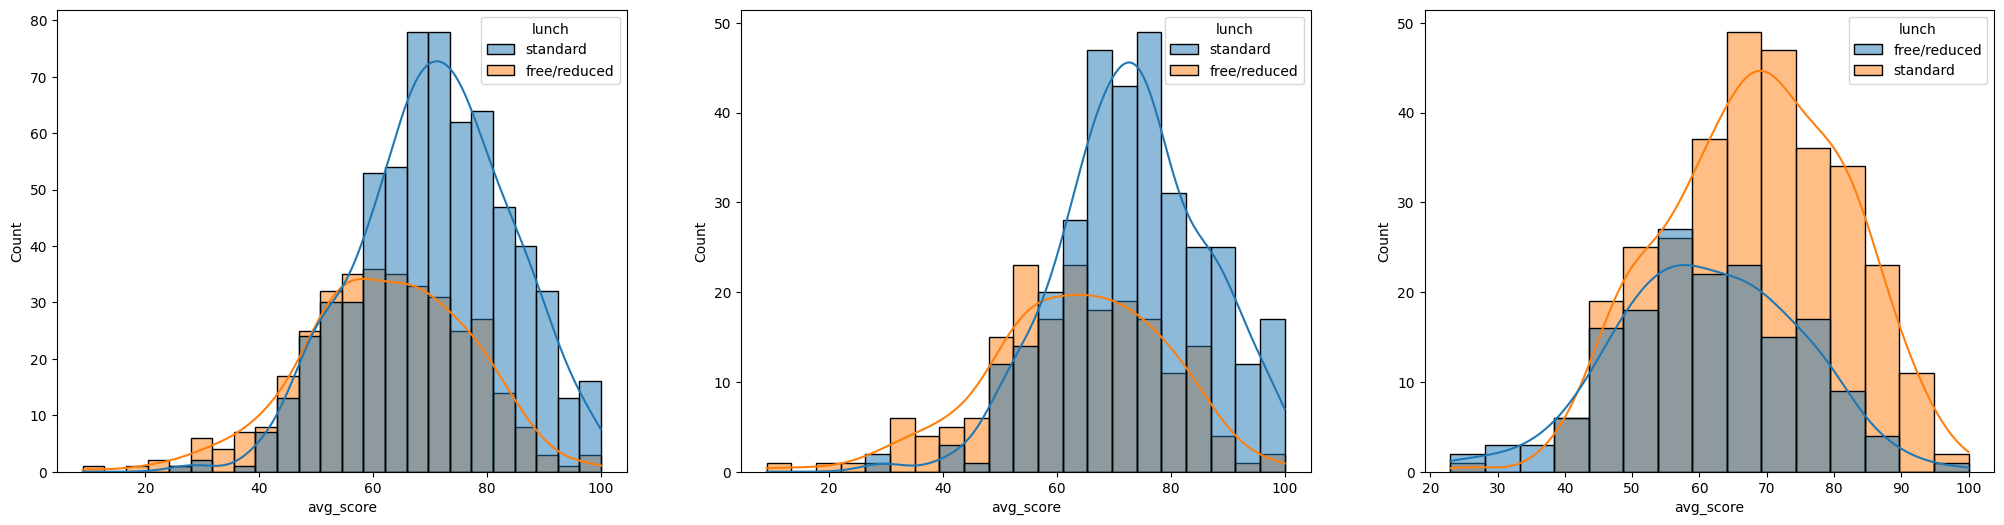

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')

Insights:
 - standart lunch helps boost the performance
 - standart lunch help boost performance in both male and female students.

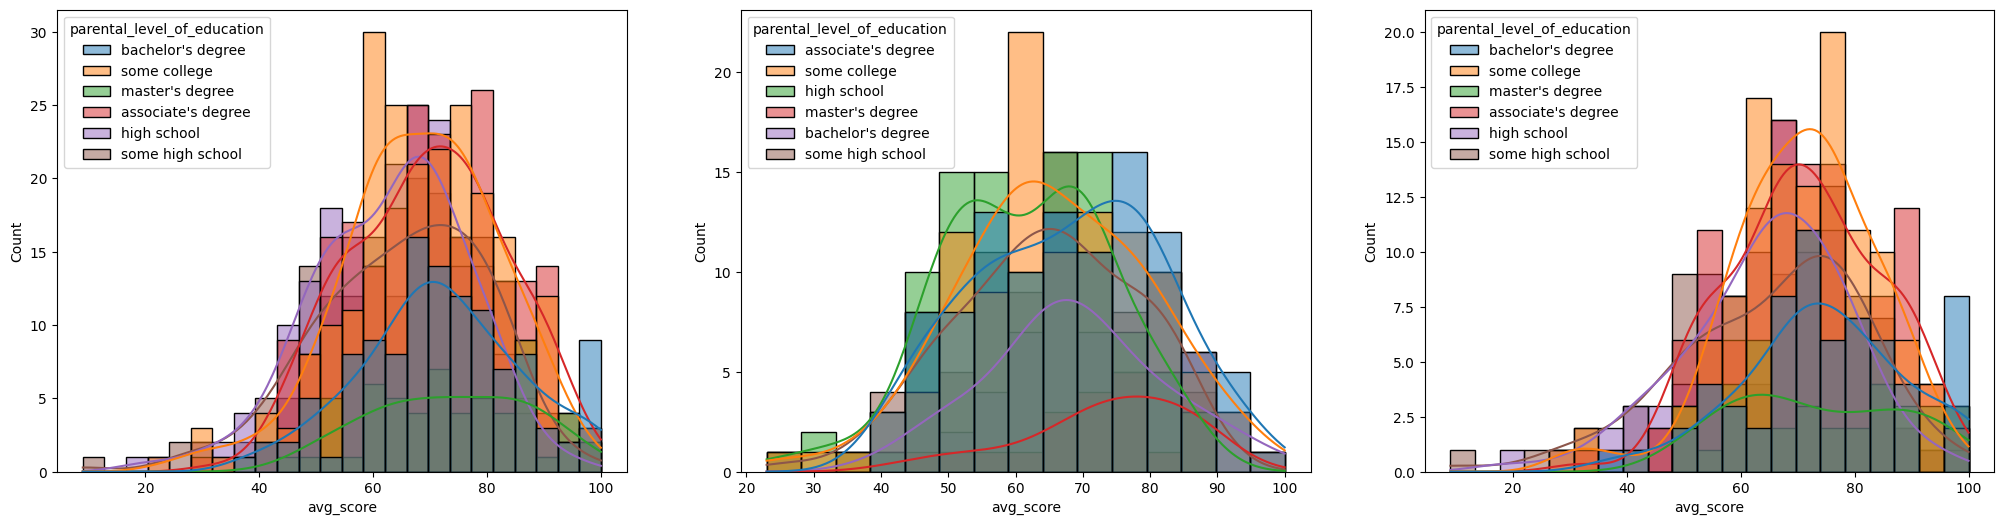

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education')

Insights
 - Students of group A and group B tends to perform poorly in exam.
 - Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximum score of students in all three subjects

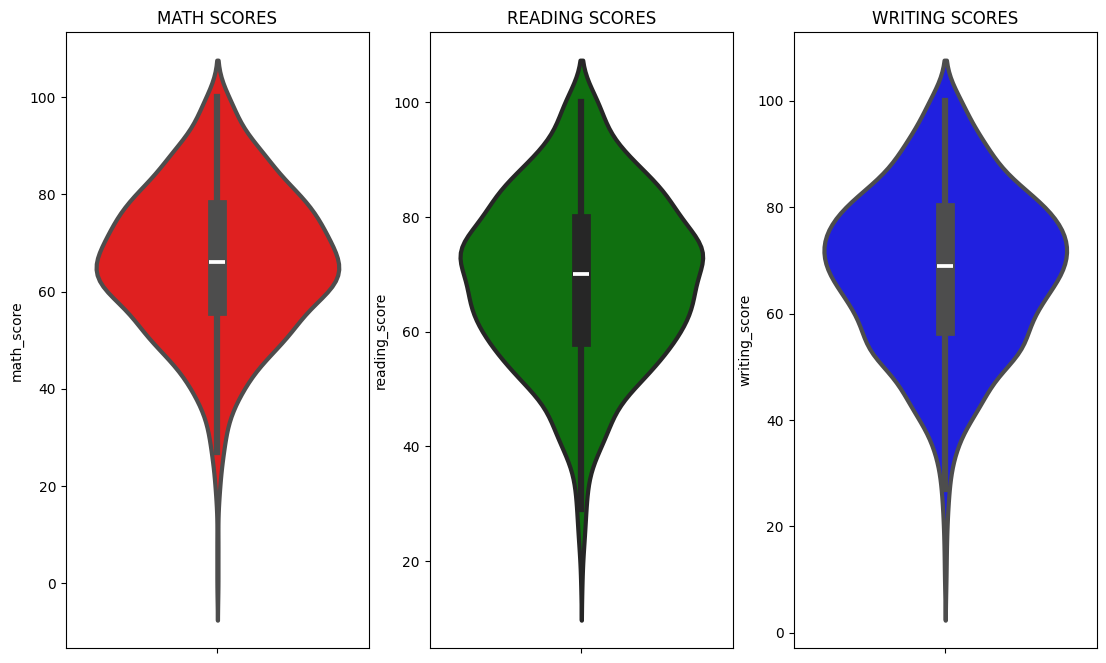

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
 - From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## Multivariate analysis using piechart

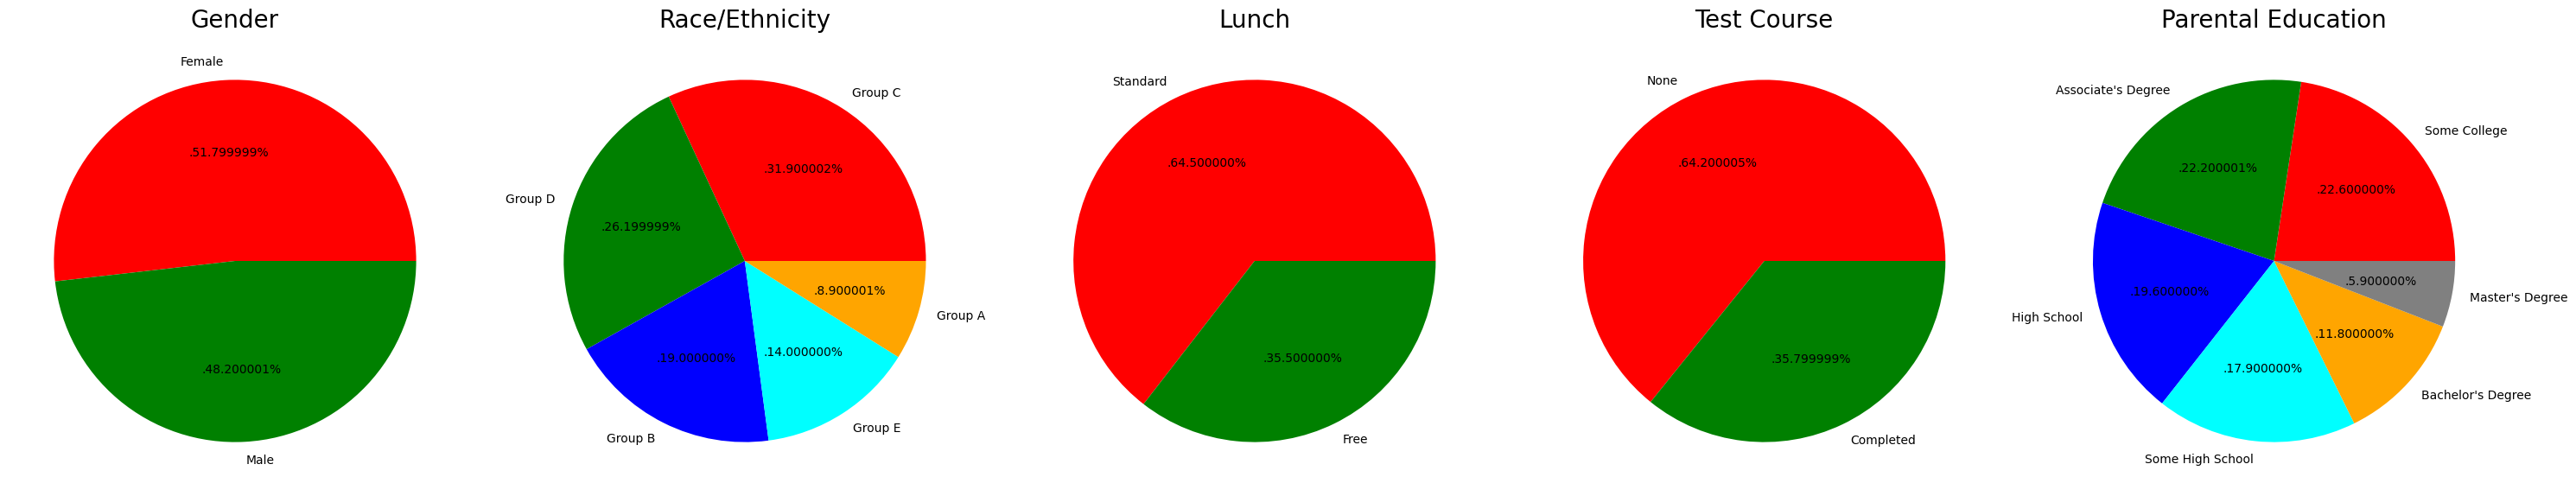

In [31]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()


Insights
  - Number of Male and Female students is almost equal
  - Number students are greatest in Group C
  - Number of students who have standard lunch are greater
  - Number of students who have not enrolled in any test preparation course is greater
  - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## feature wise visualization

### Gender column

 - how is the distribution of the gender? 
 - does gender has any impact on the student's performance?

### Univariate analysis (how is gender distributed?)

([<matplotlib.patches.Wedge at 0x1175f1590>,
 [Text(-0.062170487413935493, 1.0982416994881927, 'girl'),
  Text(0.062170321584051766, -1.0982417088756626, 'boy')])

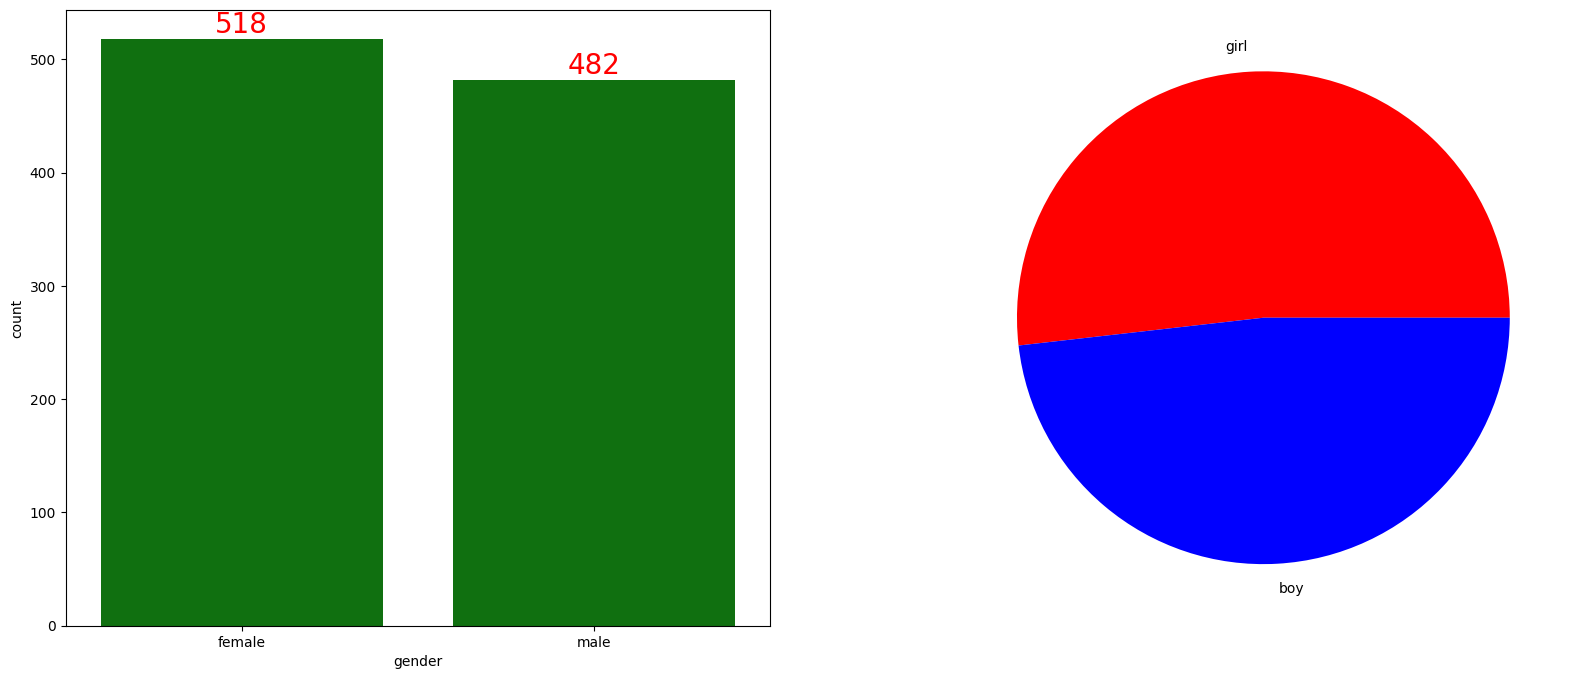

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20,8))
sns.countplot(x = df["gender"], data = df, color = 'g', ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color = "r", size = 20)
    
plt.pie(x = df["gender"].value_counts(), colors = ["red","blue"], labels = ["girl","boy"], autopct='%1.1f%%')


Insight:
- sample is balanced with 518(51.8%) women and 482(48.2%) male

### Bivariate analysis (Does the gender makes difference in student's performance ?)

In [87]:
gender = df.groupby("gender")

In [119]:
gender_mean_score = gender["avg_score"].mean(), gender["math_score"].mean()

In [120]:
avg_score = gender_mean_score[0]
math_score = gender_mean_score[1]

In [121]:
avg_score

gender
female    69.569498
male      65.837483
Name: avg_score, dtype: float64

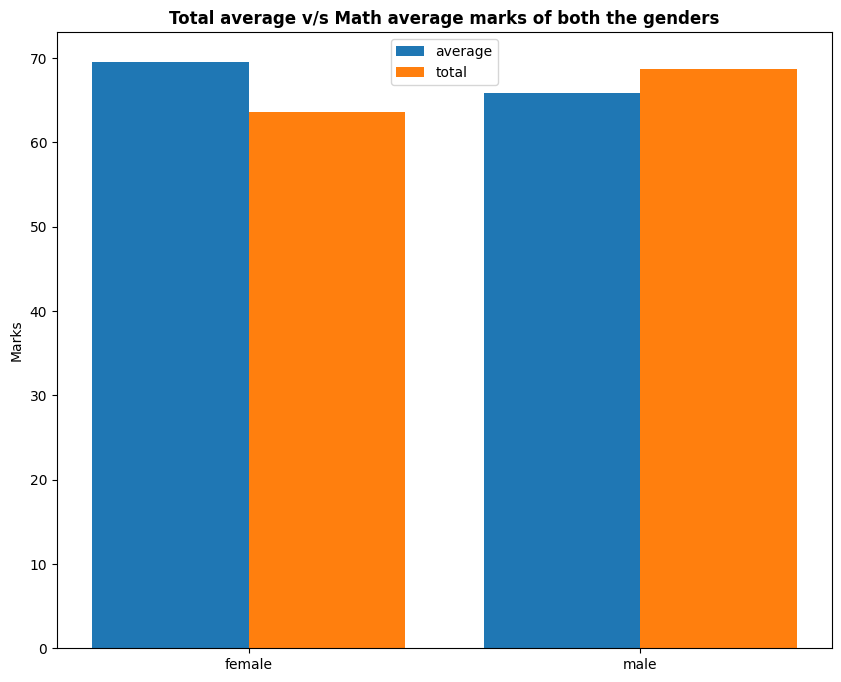

In [ ]:
plt.figure(figsize=(10, 8))

X = ['female','male']


X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, avg_score, 0.4, label = 'average')
plt.bar(X_axis + 0.2, math_score, 0.4, label = 'total')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insight:
- On average females have better score than man do
- whereas man as better math score

### Race / Ethnicity
- How is the group distributed?
- Does Race/Ethnicity has any impact on the student's performance?

### Univariate analysis (How is the group distributed?)

([<matplotlib.patches.Wedge at 0x11acede50>,
 [Text(0.5923243462640188, 0.9269044550669194, 'group C'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group D'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group B'),
  Text(0.5952332509117035, -0.9250391218803047, 'group E'),
  Text(1.0572819245745813, -0.30357030811307883, 'group A')],
 [Text(0.32308600705310114, 0.5055842482183196, '31.9%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.2%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.0%'),
  Text(0.3246726823154746, -0.5045667937528934, '14.0%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.9%')])

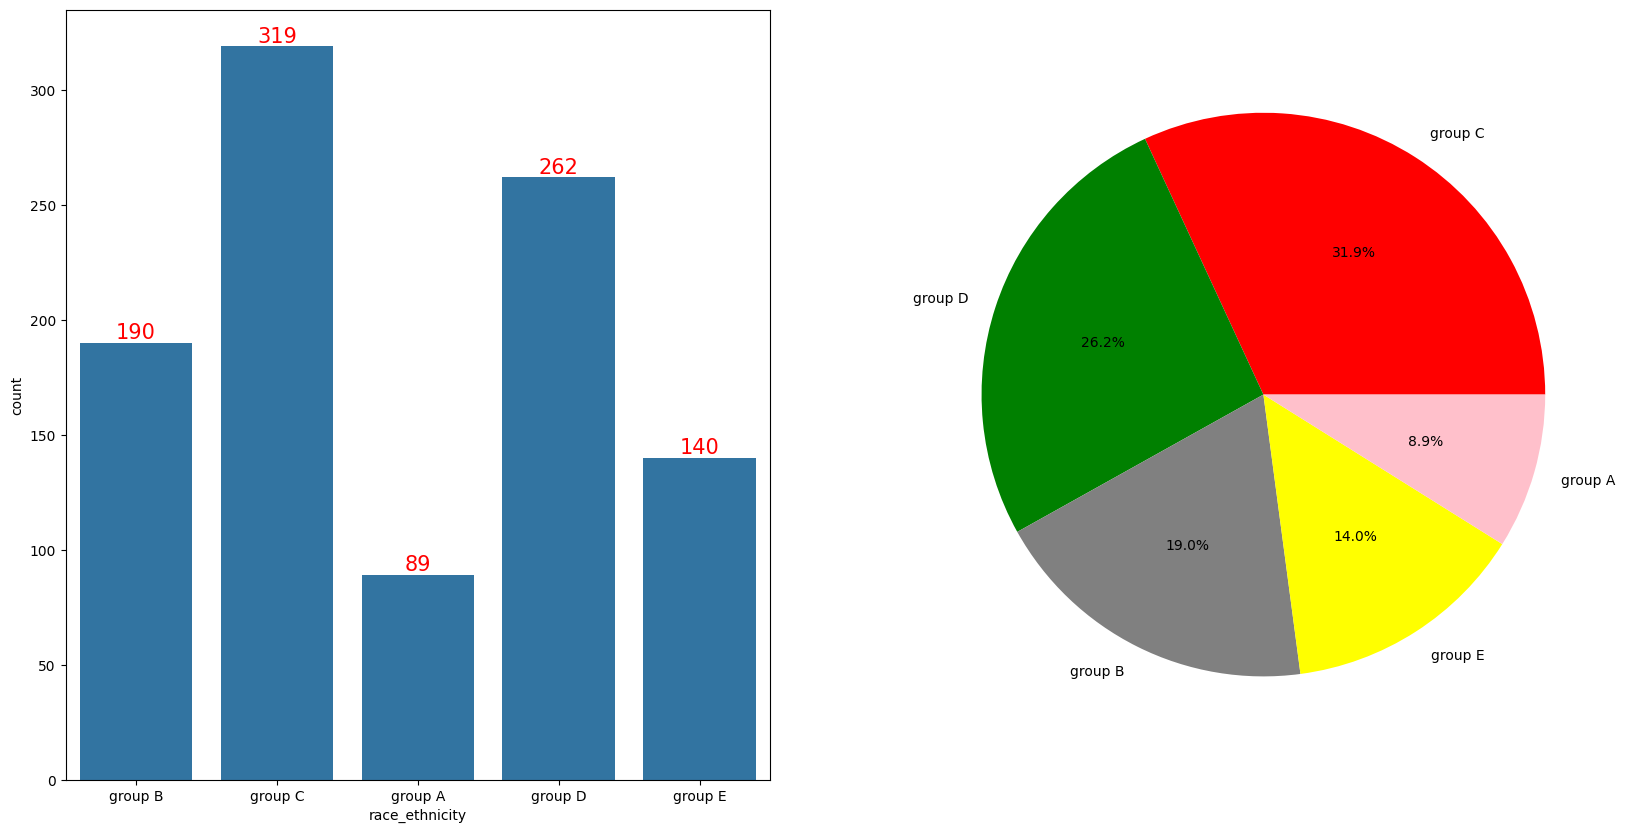

In [175]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x = df["race_ethnicity"], data = df, ax = ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container, color = "r",size = 15)

plt.pie(df["race_ethnicity"].value_counts(),labels=df["race_ethnicity"].value_counts().index, colors = ["red","green","gray","yellow","pink"],autopct='%1.1f%%')

Insight:
 - Group C and Group D has the most number of students

### Bivariate analysis (does race/ethnicity effects the student's performance?)

In [182]:
race_avg_score = df.groupby("race_ethnicity")["avg_score"].mean()

In [183]:
race_avg_score

race_ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: avg_score, dtype: float64

In [184]:
race_math_avg_score = df.groupby("race_ethnicity")["math_score"].mean()

In [185]:
race_math_avg_score

race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64

In [188]:
race_writing_mean_score = df.groupby("race_ethnicity")["writing_score"].mean()
race_writing_mean_score

race_ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing_score, dtype: float64

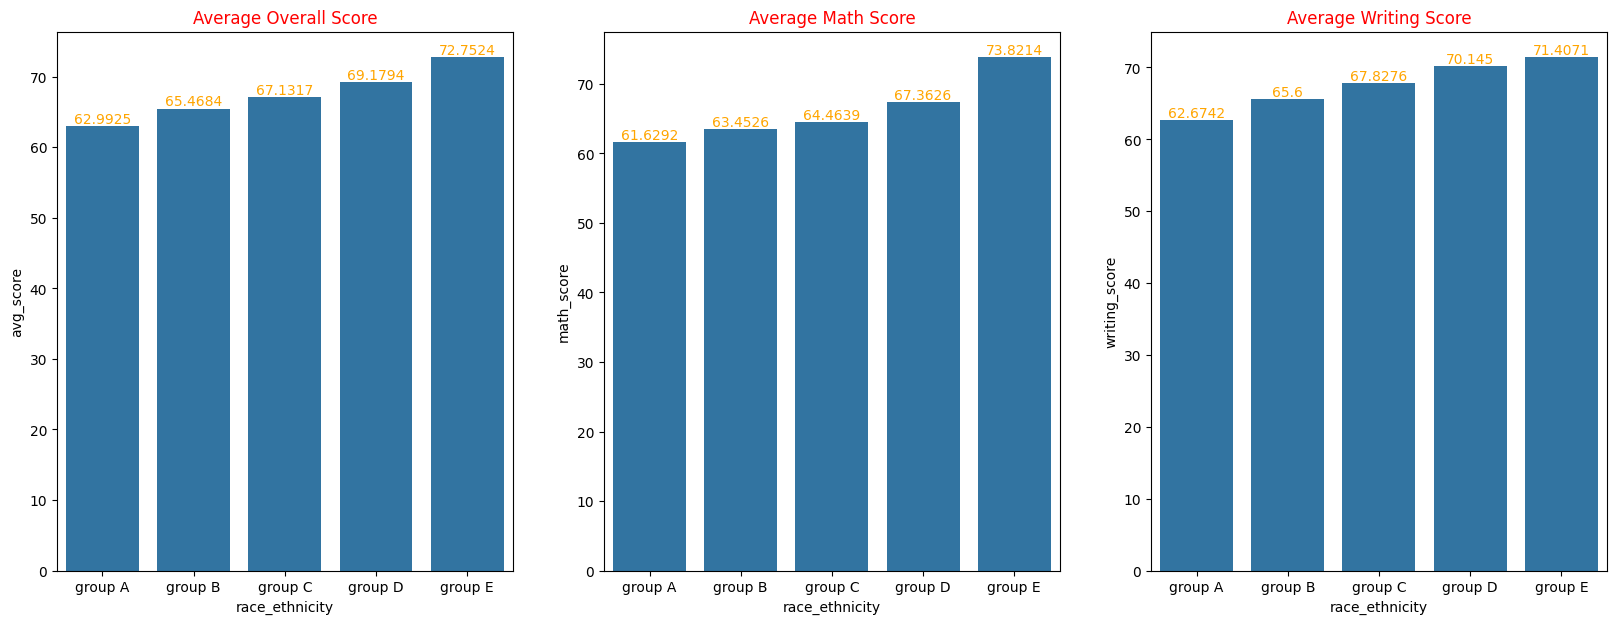

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (20,7))

sns.barplot(x = race_avg_score.index, y = race_avg_score, ax = ax[0])
ax[0].set_title("Average Overall Score", color = "r")

for container in ax[0].containers:
    ax[0].bar_label(container, color = "orange", size = 10)
    
sns.barplot(x = race_math_avg_score.index, y = race_math_avg_score, ax = ax[1])
ax[1].set_title("Average Math Score", color = "r")

for container in ax[1].containers:
    ax[1].bar_label(container, color = "orange", size = 10)
    
sns.barplot(x = race_writing_mean_score.index, y = race_writing_mean_score, ax = ax[2])
ax[2].set_title("Average Writing Score", color = "r")

for container in ax[2].containers:
    ax[2].bar_label(container, color = "orange", size = 10)

Insight:
- Overall group E is performing better in all three categories (overall avg, math avg, writing avg)
- group A has the least mean avg scores in all categories

### Checking for the outliers

<Axes: ylabel='writing_score'>

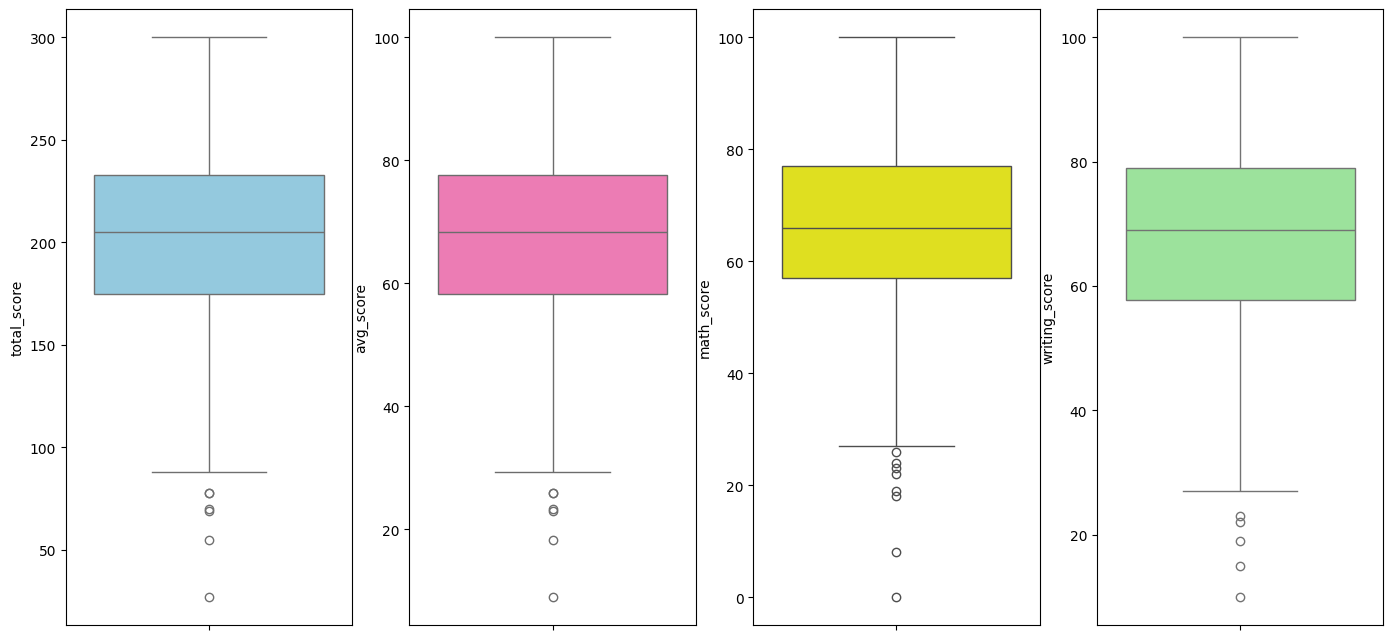

In [210]:
plt.subplots(1,4, figsize = (17,8))
plt.subplot(141)
sns.boxplot(df["total_score"], color ="skyblue")
plt.subplot(142)
sns.boxplot(df["avg_score"], color ="hotpink")
plt.subplot(143)
sns.boxplot(df["math_score"], color ="yellow")
plt.subplot(144)
sns.boxplot(df["writing_score"], color ="lightgreen")

### Multivariate analysis with paitplot

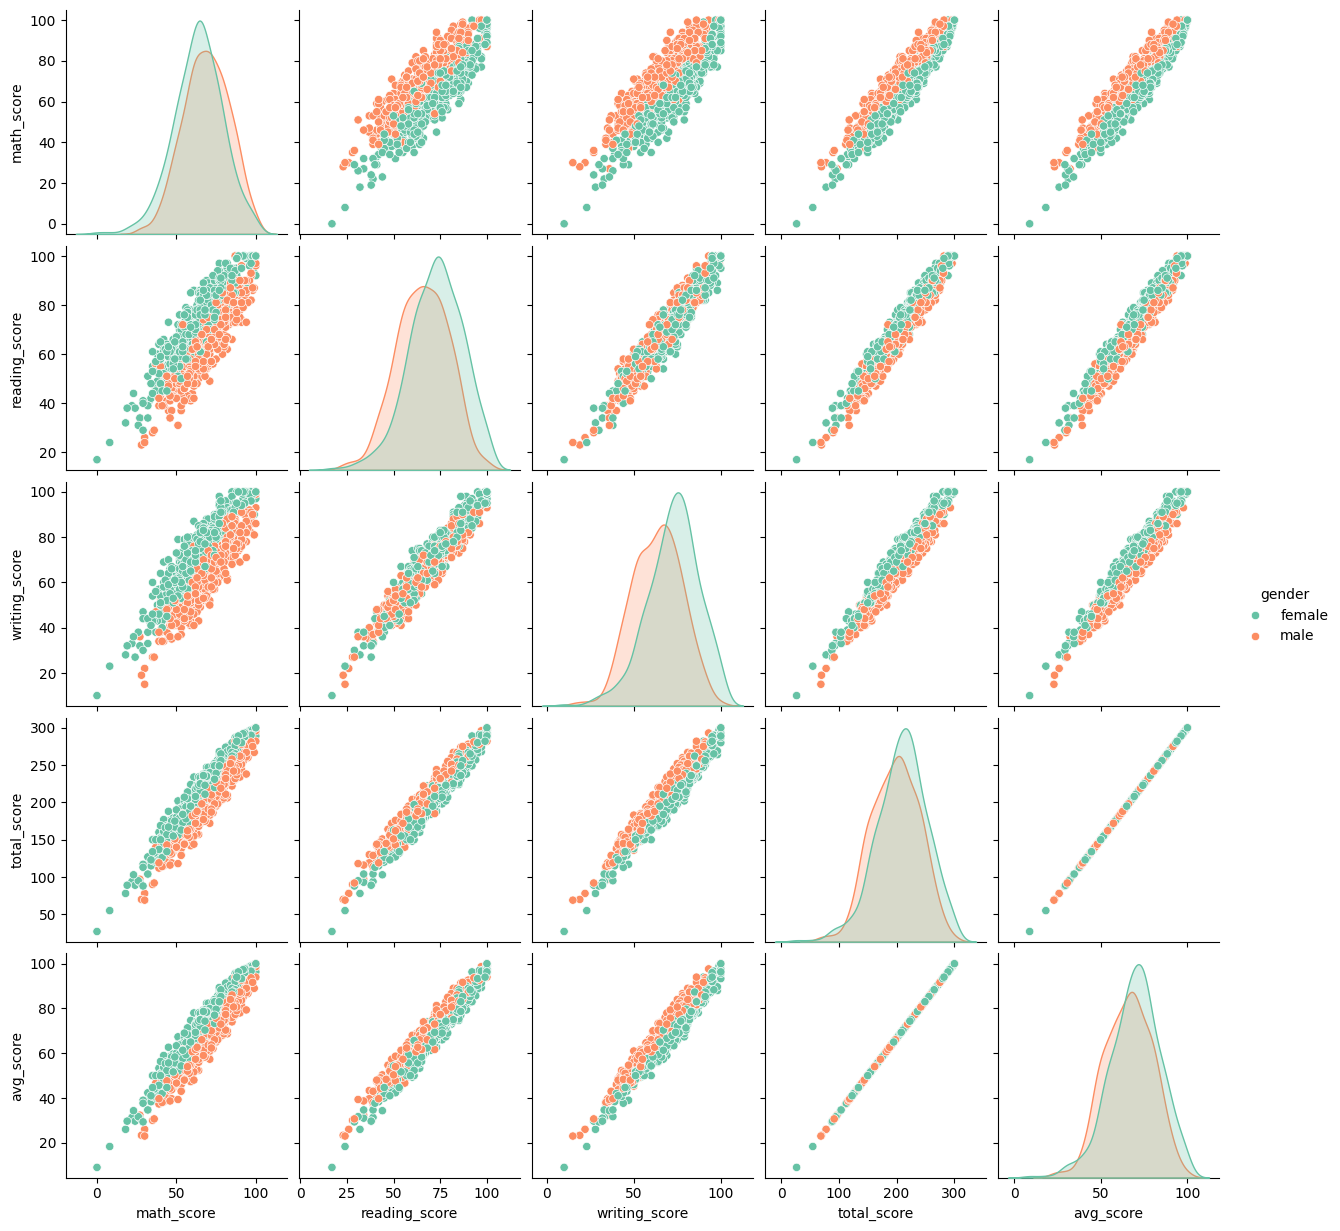

In [214]:
sns.pairplot(data = df, hue = "gender", palette = "Set2")

Insight:
- It is clear that all the scores increase linearly with each other.

# Conclusion

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.